<a href="https://colab.research.google.com/github/RajeshworM/Machine_Learning/blob/main/fasal_ensemble_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd

# Replace with the correct path to your CSV file
file_path = '/content/drive/My Drive/fasal_up.csv'

# Load the CSV into a pandas DataFrame
df = pd.read_csv(file_path)


# Replace NaN with 0
df.fillna(0, inplace=True)
# Show the first few rows of the data
df.head()


,year,yield,price_input1,price_input2,price_input3,price_input4,price_input5,price_input6,GW_10_MAY,GW_11_MAY,...,OCT1_MIN_10,OCT2_MIN_10,JUL1_MIN_11,JUL2_MIN_11,AUG1_MIN_11,AUG2_MIN_11,SEP1_MIN_11,SEP2_MIN_11,OCT1_MIN_11,OCT2_MIN_11
0,2000,1977.0,7.31,6.38,6.30,11.92,10.40,10.28,5.70,6.70,...,23.13,20.44,25.42,24.42,23.60,23.89,24.60,23.13,21.20,19.00
1,2001,2118.0,7.44,6.18,6.09,11.06,9.20,9.06,5.98,6.70,...,23.87,20.38,25.47,25.00,24.60,25.44,24.53,23.00,22.33,18.81
2,2002,1840.0,7.40,6.37,6.32,10.44,8.99,8.92,5.82,7.09,...,22.53,19.56,27.67,28.13,23.80,25.63,25.47,22.67,21.13,18.50
3,2003,2187.0,7.36,6.45,6.40,10.72,9.39,9.32,6.51,7.20,...,21.67,20.44,26.07,25.44,24.40,25.69,25.47,23.60,19.73,16.88
4,2004,1789.0,7.42,6.46,6.36,11.40,9.92,9.77,6.13,7.19,...,22.80,17.81,25.13,23.38,24.53,25.00,25.00,23.00,20.93,16.56


In [29]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
# Step 1: Define independent and dependent variables
X = df.drop(columns=['yield'])  # Independent variables (all except 'yield')
y = df['yield']  # Dependent variable (yield)

In [31]:
# Step 2: Split into training and testing datasets
# You can specify the test size; here, we use 30% for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Show the split datasets' sizes
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

Training data size: 17
Testing data size: 8


In [33]:
# Optionally, if you want a time-based split based on the 'year' column, you can do:
# Assuming you want to train on years 2000-2019 and test on 2020-2024
train_data = df[df['year'] <= 2019]
test_data = df[df['year'] >= 2020]

In [34]:
# Split the training and testing data into X and y
X_train_timebased = train_data.drop(columns=['yield'])
y_train_timebased = train_data['yield']
X_test_timebased = test_data.drop(columns=['yield'])
y_test_timebased = test_data['yield']

In [35]:
# ML Model: Random Forest
ml_model = RandomForestRegressor(random_state=42)
ml_model.fit(X_train_timebased, y_train_timebased)
ml_predictions = ml_model.predict(X_test_timebased)


# Econometric Model: Linear Regression
econometric_model = LinearRegression()
econometric_model.fit(X_train_timebased, y_train_timebased)
econ_predictions = econometric_model.predict(X_test_timebased)

In [36]:
# Combine predictions using Weighted Averaging
weights = [0.6, 0.4]  # Assigning weights to models
ensemble_predictions = (weights[0] * ml_predictions +
                        weights[1] * econ_predictions)

# Evaluate the Ensemble Model
mse = mean_squared_error(y_test_timebased, ensemble_predictions)
print(f"Mean Squared Error of Ensemble Model: {mse}")

Mean Squared Error of Ensemble Model: 1277633.5712010274


In [38]:
# Stack predictions as new features
stacked_features = np.column_stack((ml_predictions, econ_predictions))

# Train a meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, y_test_timebased)
final_predictions = meta_model.predict(stacked_features)

# Evaluate Stacked Ensemble
mse_stacked = mean_squared_error(y_test_timebased, final_predictions)
print(f"Mean Squared Error of Stacked Ensemble Model: {mse_stacked}")

Mean Squared Error of Stacked Ensemble Model: 789663.0259495439


MSE for ML Model (Random Forest): 1229843.5680000002
MSE for Econometric Model: 1428754.3817994697
MSE for Ensemble Model (Weighted): 1277633.5712010274
MSE for Ensemble Model (Stacked): 789663.0259495439


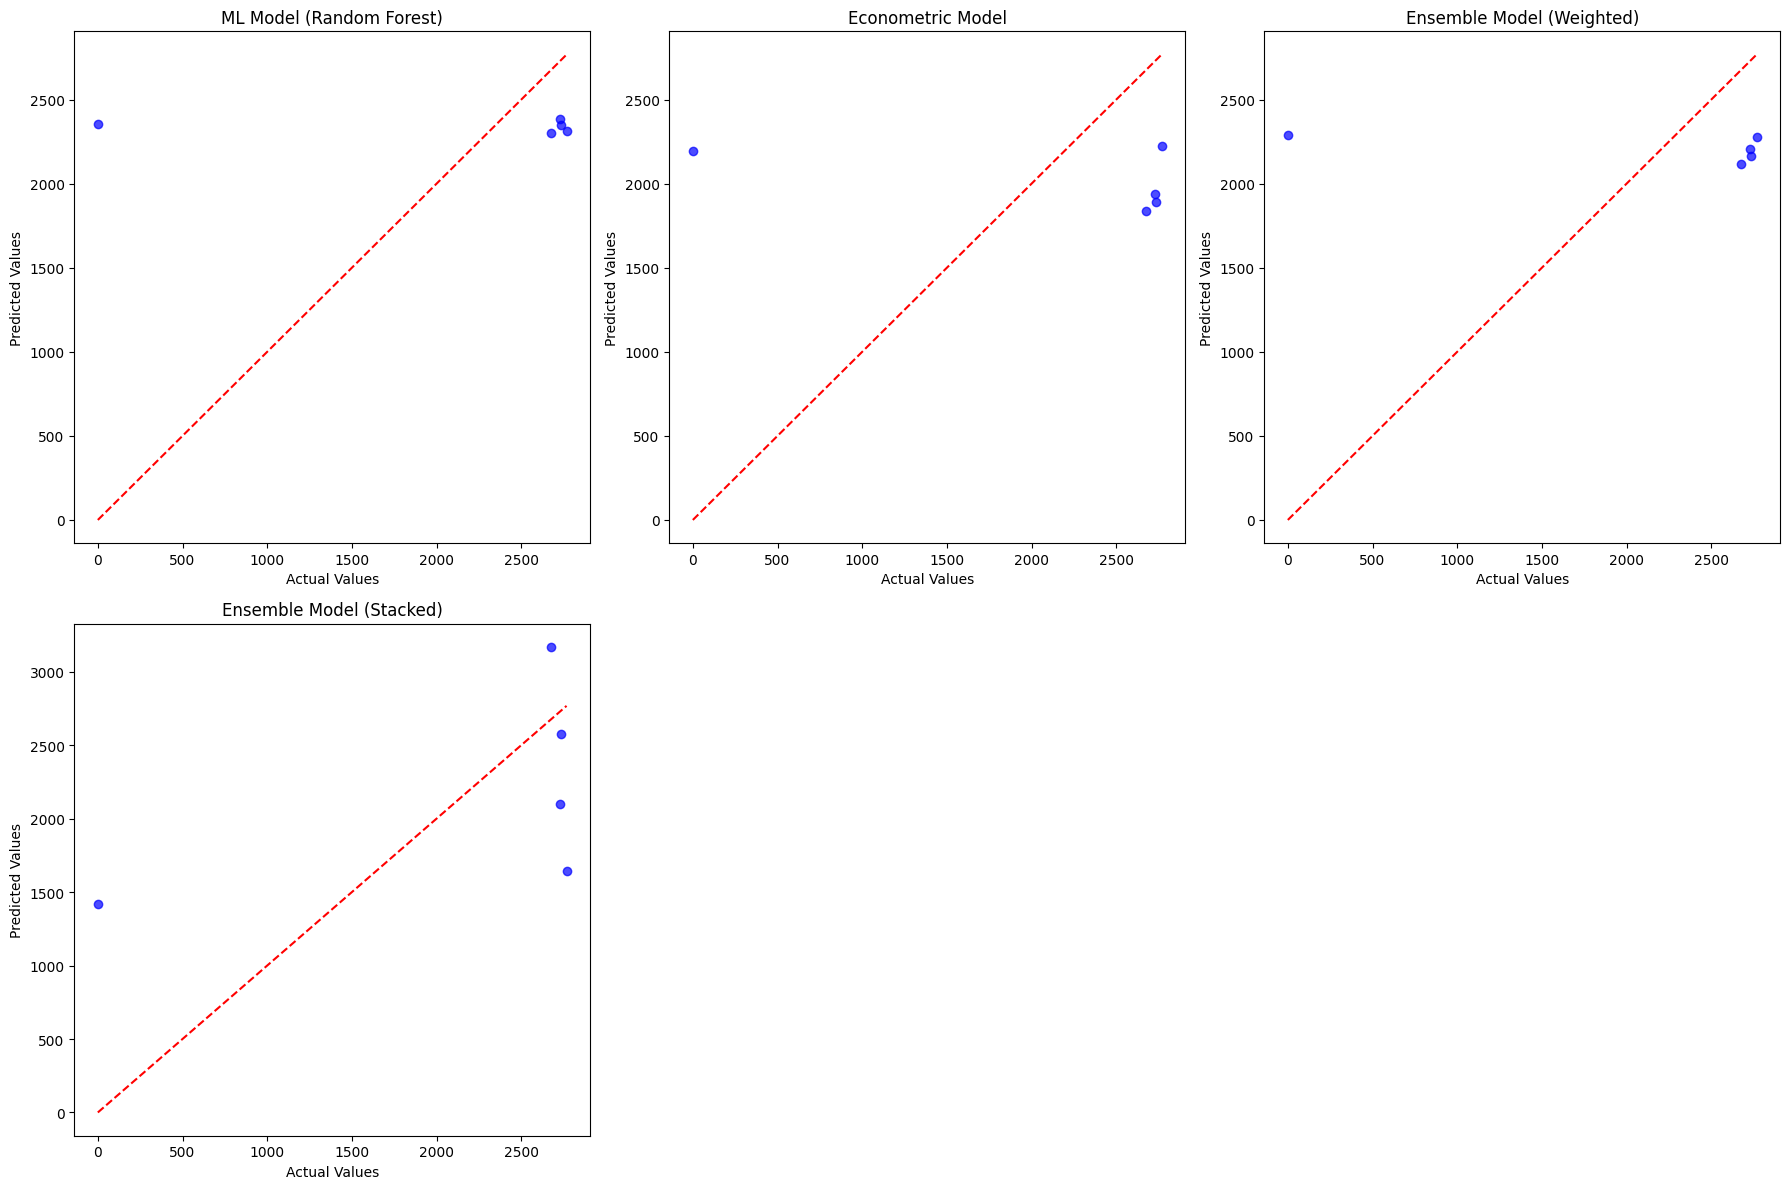


Conclusion:
The best model is 'Ensemble Model (Stacked)' with the lowest MSE: 789663.0259495439.


In [39]:
import matplotlib.pyplot as plt

# Function to calculate and print MSE for each model
def evaluate_models(y_actual, predictions, model_name):
    mse = mean_squared_error(y_actual, predictions)
    print(f"MSE for {model_name}: {mse}")
    return mse

# Evaluate individual models and the ensemble model
ml_mse = evaluate_models(y_test_timebased, ml_predictions, "ML Model (Random Forest)")
econ_mse = evaluate_models(y_test_timebased, econ_predictions, "Econometric Model")
ensemble_mse = evaluate_models(y_test_timebased, ensemble_predictions, "Ensemble Model (Weighted)")
stacked_mse = evaluate_models(y_test_timebased, final_predictions, "Ensemble Model (Stacked)")

# Scatter plots to compare actual vs. predicted values
models = [
    (ml_predictions, "ML Model (Random Forest)"),
    (econ_predictions, "Econometric Model"),
    (ensemble_predictions, "Ensemble Model (Weighted)"),
    (final_predictions, "Ensemble Model (Stacked)")
]

plt.figure(figsize=(18, 12))

for i, (predictions, title) in enumerate(models, 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test_timebased, predictions, alpha=0.7, color='blue')
    plt.plot([y_test_timebased.min(), y_test_timebased.max()], [y_test_timebased.min(), y_test_timebased.max()], 'r--')  # Ideal line
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# Conclusion: Compare MSE values and identify the best model
mse_values = {
    "ML Model (Random Forest)": ml_mse,
    "Econometric Model": econ_mse,
    "Ensemble Model (Weighted)": ensemble_mse,
    "Ensemble Model (Stacked)": stacked_mse
}

best_model = min(mse_values, key=mse_values.get)
print("\nConclusion:")
print(f"The best model is '{best_model}' with the lowest MSE: {mse_values[best_model]}.")
